In [295]:
class Hierarchy:
    
    def __init__(self, df):
        
        self.n_cluster = 5
        self.Z = hierarchy.ward(pdist(df))
        self.Z_ind = hierarchy.leaves_list(self.Z)
        
        self.n_cluster_T = 5
        self.Z_T = hierarchy.ward(pdist(df.T))
        self.Z_T_ind = hierarchy.leaves_list(self.Z_T)
        
    def fcls(self, transpose=False, n_cluster=None, n_cluster_T=None):
        
        if n_cluster != None: self.n_cluster = n_cluster
        if n_cluster_T != None: self.n_cluster_T = n_cluster_T
        
        if transpose:
            #上から何個目の分岐点までを取るかの距離を指定
            t1 = self.Z_T.T[2][-self.n_cluster_T]
            #分類されるクラスターラベルを取得
            self.fcls_T = hierarchy.fcluster(self.Z_T, t=t1, criterion='distance')
            
            return self.fcls_T
        
        else:
            #上から何個目の分岐点までを取るかの距離を指定
            t1 = self.Z.T[2][-self.n_cluster]
            #分類されるクラスターラベルを取得
            self.fcls = hierarchy.fcluster(self.Z, t=t1, criterion='distance')

            return self.fcls
    
    def plot_dendrogram(self, transpose=False, n_cluster=None, linewidth=1, ax=None, loc="top"):
        
        if n_cluster != None: self.n_cluster = n_cluster

        #linewidth
        plt.rcParams['lines.linewidth'] = linewidth

        if transpose:
            #上から何個目の分岐点までを取るかの距離を指定
            t2 = self.Z_T.T[2][-(self.n_cluster_T-1)]
            #plotting dendrogram
            hierarchy.dendrogram(self.Z_T, color_threshold=t2, no_labels=True, ax=ax,
                                 above_threshold_color="darkslategray", orientation=loc)
        else:
            #上から何個目の分岐点までを取るかの距離を指定
            t2 = self.Z.T[2][-(self.n_cluster-1)]
            #plotting dendrogram
            hierarchy.dendrogram(Z, color_threshold=t2, no_labels=True, ax=ax,
                                 above_threshold_color="darkslategray", orientation=loc)

In [170]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [129]:
import pandas as pd

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [130]:
df = pd.read_csv("./merged_file.csv")

In [149]:
df_main = df.iloc[:, 12:]
df_sub = df.iloc[0:, 1:12]

In [165]:
sub = df_sub.shape[1]
sub_ratio = [1]*sub + [0]

add_col = 2
add_wid = (1,1)

cbar_hratio = (1,1)
cbar_wratio = (0, 1, 9)

n_left = 6
left_ratio = [1]*n_left

n_right = 5
right_ratio = [1]*n_right

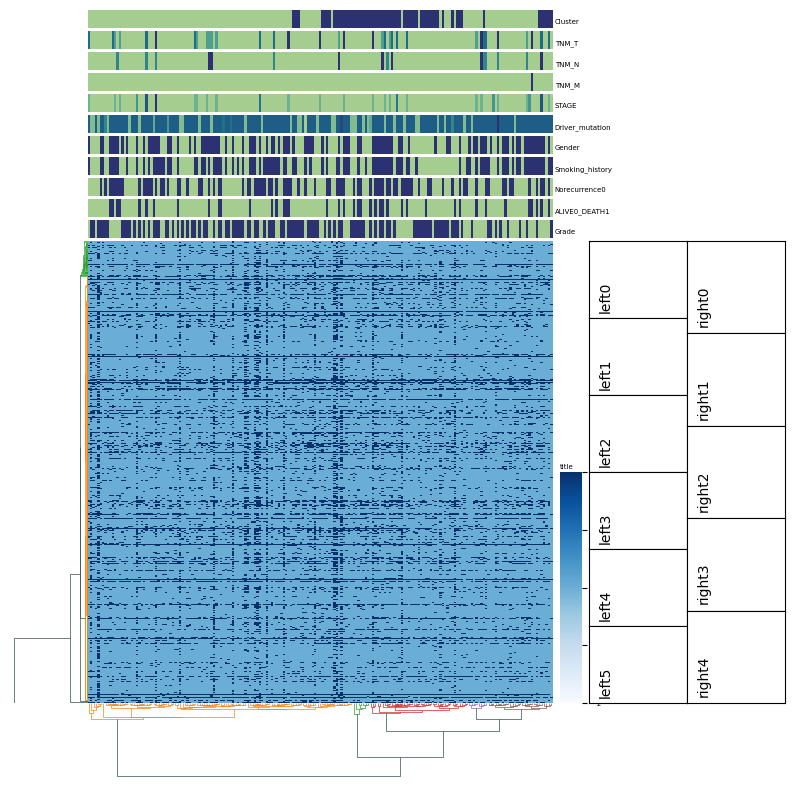

In [305]:
figure = plt.figure(figsize=(10,10))

#----------gridspec----------

#master_grid(全体枠)
gs_master = GridSpec(nrows=3, ncols=3, height_ratios=(3, 6, 1), width_ratios=(1, 6, 3), hspace=0, wspace=0)

#sub_plot枠
gs_sub = GridSpecFromSubplotSpec(sub+1, 1, subplot_spec=gs_master[0,1], height_ratios=sub_ratio, hspace=0.2, wspace=0)
gs_txt = GridSpecFromSubplotSpec(sub+1, 1, subplot_spec=gs_master[0,2], height_ratios=sub_ratio, hspace=0.2, wspace=0)

#c_bar + add_plot枠
gs_12 = GridSpecFromSubplotSpec(2, 3, subplot_spec=gs_master[1,2], height_ratios=cbar_hratio, width_ratios=cbar_wratio, hspace=0, wspace=0.1)

#add_plot枠
gs_add = GridSpecFromSubplotSpec(1, add_col, subplot_spec=gs_12[:,2], width_ratios=add_wid, hspace=0, wspace=0)
gs_left = GridSpecFromSubplotSpec(n_left, 1, subplot_spec=gs_add[:,0], height_ratios=left_ratio, hspace=0, wspace=0)
gs_right = GridSpecFromSubplotSpec(n_right, 1, subplot_spec=gs_add[:,1], height_ratios=right_ratio, hspace=0, wspace=0)


#----------main+cbar----------

#cbar
ax_cbar = figure.add_subplot(gs_12[1,1])
ax_cbar.tick_params(labelsize=5, right=False)
ax_cbar.set_title("title", loc="left", size=5, y=1.0, pad=2)

#main_plot
ax_main = figure.add_subplot(gs_master[1,1])
sns.heatmap(data=df_main.T, ax=ax_main, cbar_ax=ax_cbar, cmap="Blues", cbar_kws={"ticks":[-2,-1,0,1,2]}, vmin=-2, vmax=2, center=0)
ax_main.axis("off")



#----------dendrogram----------

hie = Hierarchy(df_main)

#dendro_left
ax_denL = figure.add_subplot(gs_master[1,0])
hie.plot_dendrogram(transpose=True, ax=ax_denL, loc="left", linewidth=0.5)

ax_denL.axis("off")

#dendro_bottom
ax_denB = figure.add_subplot(gs_master[2,1])
hie.plot_dendrogram(transpose=False, ax=ax_denB, loc="bottom", linewidth=0.5, )
ax_denB.axis("off")

#----------sub_plot----------

#sub_plot
for i, c in enumerate(df_sub.columns):
    data = df_sub.loc[hie.Z_ind[::-1], c].values.reshape(-1,1)
    
    ax_sub = figure.add_subplot(gs_sub[i])
    ax_txt = figure.add_subplot(gs_txt[i])
    sns.heatmap(data=data.T, ax=ax_sub, cbar=False, cmap="crest")
    ax_txt.text(s=f"{c}", x=0.01, y=0.2, size=5)
    
    ax_sub.axis("off")
    ax_txt.axis("off")

#----------cbar+add----------



#left
for i in range(n_left):
    ax_left = figure.add_subplot(gs_left[i])
    ax_left.set_yticks([])
    ax_left.set_xticks([])
    ax_left.text(s=f"left{i}", x=0.1, y=0.1, rotation='vertical')
    
#right
for i in range(n_right):
    ax_left = figure.add_subplot(gs_right[i])
    ax_left.set_yticks([])
    ax_left.set_xticks([])
    ax_left.text(s=f"right{i}", x=0.1, y=0.1, rotation='vertical')


plt.show()

In [316]:
df_main.iloc[:20, :20]

,eRNA1,eRNA2,eRNA3,eRNA4,eRNA5,eRNA6,eRNA7,eRNA8,eRNA9,eRNA10,eRNA11,eRNA12,eRNA13,eRNA14,eRNA15,eRNA16,eRNA17,eRNA18,eRNA19,eRNA20
0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,48.032656,0.000000,0.000000,38.883579,0.000000,0.0,0.000000,0,0.000000,0.000000,364.470973,0.000000,0.000000
1,0.0,0.000000,46.640901,101.190476,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000000,37.387646,0.000000,0.000000,214.012041
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,36.824017,0.000000,0.000000,29.809919,113.819689,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,46.770734
3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,31.193406,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,183.135481,0.000000
4,0.0,71.826355,20.439564,0.000000,0.0,0.0,0.0,0.000000,24.876445,0.000000,0.000000,71.324072,0.0,56.663013,0,0.000000,0.000000,153.209005,0.000000,14.654228
5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,43.766070,0.000000,0.0,0.0,0.0,49.410111,0.000000,0.000000,39.998661,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,62.756520
7,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,202.853026,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,34.348580,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,80.087725,0.000000,0.000000,32.416460,0.000000,0.0,0.000000,0,0.000000,71.081877,75.963036,0.000000,50.860308


In [314]:
hie = Hierarchy(df_main.iloc[:20, :20])

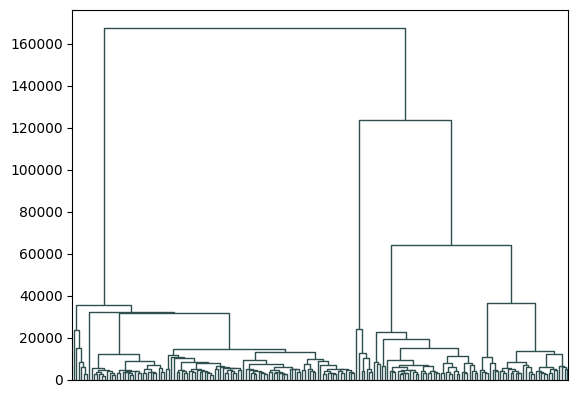

In [315]:
hie.plot_dendrogram()

In [ ]:
figure = plt.figure(figsize=(5,5))

#----------gridspec----------
#master_grid    --->   dendrogramを描画する
gs_master = GridSpec(nrows=3, ncols=3, height_ratios=(3, 6, 1), width_ratios=(1, 6, 3), hspace=0, wspace=0)

gs_sub = GridSpecFromSubplotSpec(sub+1, 1, subplot_spec=gs_master[0,1], height_ratios=sub_ratio, hspace=0.2, wspace=0)

gs_12 = GridSpecFromSubplotSpec(2, 3, subplot_spec=gs_master[1,2], height_ratios=cbar_hratio, width_ratios=cbar_wratio, hspace=0, wspace=0.1)

gs_add = GridSpecFromSubplotSpec(1, add_col, subplot_spec=gs_12[:,2], width_ratios=add_wid, hspace=0, wspace=0)
gs_left = GridSpecFromSubplotSpec(n_left, 1, subplot_spec=gs_add[:,0], height_ratios=left_ratio, hspace=0, wspace=0)
gs_right = GridSpecFromSubplotSpec(n_right, 1, subplot_spec=gs_add[:,1], height_ratios=right_ratio, hspace=0, wspace=0)

#main_plot
ax_main = figure.add_subplot(gs_master[1,1])
ax_main.set_yticks([])
ax_main.set_xticks([])
ax_main.text(s=f"main", x=0.4, y=0.4)

#dendro_left
ax_denL = figure.add_subplot(gs_master[1,0])
ax_denL.set_yticks([])
ax_denL.set_xticks([])
ax_denL.text(s=f"denL", x=0.4, y=0.4, rotation="vertical")

#dendro_bottom
ax_denB = figure.add_subplot(gs_master[2,1])
ax_denB.set_yticks([])
ax_denB.set_xticks([])
ax_denB.text(s=f"denB", x=0.4, y=0.4)

#sub_plot
for i in range(sub):
    ax_sub = figure.add_subplot(gs_sub[i])
    ax_sub.set_yticks([])
    ax_sub.set_xticks([])
    
    ax_sub.text(s=f"sub{i}", x=0.1, y=0.1)
    ax_sub.text(s=f"text{i}", x=1.02, y=0.2)

#cbar
ax_cbar = figure.add_subplot(gs_12[1,1])
ax_cbar.set_yticks([])
ax_cbar.set_xticks([])
ax_cbar.text(s="cbar", x=0.1, y=0.1, rotation='vertical')

#left
for i in range(n_left):
    ax_left = figure.add_subplot(gs_left[i])
    ax_left.set_yticks([])
    ax_left.set_xticks([])
    ax_left.text(s=f"left{i}", x=0.1, y=0.1, rotation='vertical')
    
#right
for i in range(n_right):
    ax_left = figure.add_subplot(gs_right[i])
    ax_left.set_yticks([])
    ax_left.set_xticks([])
    ax_left.text(s=f"right{i}", x=0.1, y=0.1, rotation='vertical')


plt.show()